In [ ]:
from tensorflow import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import SGD
from keras import backend as K
import matplotlib.pyplot as plt
from keras import utils as np_utils
import numpy as np
from keras.utils.np_utils import to_categorical

batch_size = 128
num_classes = 10
epochs = 30

img_rows, img_cols = 32,32

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
print(x_train[0].shape, x_test.shape[0])
print(y_test[0])

(32, 32, 3) 10000
[3]


In [ ]:
# Vectorization
x_train = x_train.reshape(-1, 3072) # N
x_test = x_test.reshape(-1, 3072)

# Change type of dataset to float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# normalize (0-1)
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

50000 train samples
10000 test samples


In [ ]:
# Before one hot coding
print(y_train[3])
print(y_test[3])
# After one hot coding output train và output test
y_train =  to_categorical(y_train, num_classes)
y_test =  to_categorical(y_test, num_classes)
# After change
print(y_train[3])

[4]
[0]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [ ]:
model = Sequential()
# input_shape
model.add(Dense(3000, activation='relu', input_shape=(3072,)))
model.add(Dense(2000, activation='relu'))
model.add(Dense(1500, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 3000)              9219000   
_________________________________________________________________
dense_6 (Dense)              (None, 2000)              6002000   
_________________________________________________________________
dense_7 (Dense)              (None, 1500)              3001500   
_________________________________________________________________
dense_8 (Dense)              (None, 32)                48032     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                330       
Total params: 18,270,862
Trainable params: 18,270,862
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
H = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/30
391/391 [==============================] - 7s 17ms/step - loss: 2.3316 - accuracy: 0.0966 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/30
391/391 [==============================] - 6s 16ms/step - loss: 2.3027 - accuracy: 0.0984 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/30
391/391 [==============================] - 6s 16ms/step - loss: 2.3027 - accuracy: 0.1007 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/30
391/391 [==============================] - 6s 16ms/step - loss: 2.3027 - accuracy: 0.0994 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/30
391/391 [==============================] - 6s 16ms/step - loss: 2.3027 - accuracy: 0.0988 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/30
391/391 [==============================] - 6s 16ms/step - loss: 2.3027 - accuracy: 0.0989 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/30
391/391 [==============================] - 6s 16ms/step - loss: 2.3027 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.302591323852539
Test accuracy: 0.10000000149011612


Predicted:  frog


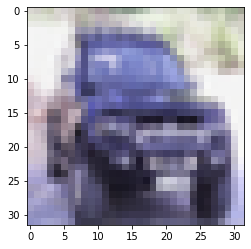

In [ ]:
plt.imshow(x_test[9].reshape(32,32,-1), cmap='gray')

y_predict = model.predict(x_test[9].reshape((1,3072)))

A=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

print('Predicted: ', A[np.argmax(y_predict)])